# Práctica 3

Considere un problema de búsqueda con estados $\{A, B, C, D, E, F, G, H, I, J\}$ . Donde $A$ es el
estado inicial y J el único estado objetivo. Las acciones que se pueden ejecutar en cada estado se
especifican por una pareja $(s, c)$ donde $s$ es el estado resultante de ejecutar la acción y $c$ es el costo
de la acción:

\begin{align*}
A(h=8)   &: (B, 4),\ (E, 2),\ (H, 3) \\
B(h=3)   &: (C, 4),\ (D, 2),\ (E, 1),\ (G, 4),\ (I, 5) \\
C(h=2)   &: (E, 1),\ (F, 3),\ (G, 3),\ (I, 2) \\
D(h=4)   &: (A, 3),\ (C, 2),\ (E, 5),\ (F, 4),\ (H, 5) \\
E(h=10)  &: (D, 5) \\
F(h=10)  &: (B, 4),\ (H, 5) \\
G(h=13)  &: (H, 1) \\
H(h=12)  &: (F, 4),\ (G, 2) \\
I(h=0)   &: (C, 5),\ (G, 1),\ (H, 4),\ (J, 1) \\
J(h=0)   &: \\
\end{align*}

El valor en paréntesis al frente de cada estado corresponde al valor de la heurística h.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def get_structure(s):
    new_s = [a for a,_ in s]
    return new_s

class Graph:
    def __init__(self,costed_edges,heuristics):
        self.costed_edges = costed_edges
        self.heuristics = heuristics

        self.adj_list = {i:set() for i in self.heuristics}

        for a,b in costed_edges.keys():
            self.adj_list[a].add(b)

    def defineSortCriteria(self,option = None):
        flag = False
        if option == 'ascending label':
            for node, adj in self.adj_list.items():
                l = list(adj)
                l.sort()
                self.adj_list[node] = l
            flag = True
        elif option == 'descending label':
            for node, adj in self.adj_list.items():
                l = list(adj)
                l.sort(reverse = True)
                self.adj_list[node] = l
            flag = True
        elif option is None:
            for node, adj in self.adj_list.items():
                l = list(adj)
                self.adj_list[node] = l
            flag = True
        return flag

    def contains(self,node):
        return node in self.adj_list.keys()
    
    def h(self,node):
        if node not in self.heuristics.keys(): return None
        return self.heuristics[node]

    def cost(self,a,b):
        if (a,b) not in self.costed_edges.keys(): return None
        return  self.costed_edges[(a,b)]

    def adj(self,node):
        if node not in self.adj_list.keys(): return None
        return self.adj_list[node]
    
    def draw(self, path = None, title=None):
        G = nx.DiGraph()
        for a, b in self.costed_edges.keys():
            weight = self.cost(a, b)
            heuristic = self.h(b)
            label = f"c:{weight}, h:{heuristic}"
            G.add_edge(a, b, label=label)

        pos = nx.circular_layout(G)
        edge_labels = nx.get_edge_attributes(G, 'label')

        plt.figure(figsize=(12, 8))
        nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        if path:
            path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
            path_edges_labels = {edge: 'Path' for edge in path_edges}

            cost = sum(self.cost(a, b) for a, b in path_edges)

            nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=path_edges_labels, font_color='red')
            if title: title+= f"Path: {' -> '.join(map(str, path))} Total Cost: {cost}"
            else: title = f"Path: {' -> '.join(map(str, path))} Total Cost: {cost}"
            
        if title:
            plt.title(title)
        plt.show()

    def print_structure(self):
        nodes = sorted(self.adj_list.keys())
        max_name_len = max(len(str(n)) for n in nodes)
        max_h_len = max(len(str(self.h(n))) for n in nodes)
        for node in nodes:
            neighbours = sorted(self.adj(node))
            strings = [f'({n},{self.cost(node,n)})' for n in neighbours]
            s = ', '.join(strings)
            node_str = str(node).ljust(max_name_len)
            h_str = str(self.h(node)).rjust(max_h_len)
            print(f'{node_str}(h = {h_str})  :  {s}')


In [2]:
h = {
    'A': 8, 'B': 3, 'C': 2, 'D': 4, 'E': 10,
    'F': 10, 'G': 13, 'H': 12, 'I': 0, 'J': 0
}

c = {
    ('A', 'B'): 4, ('A', 'E'): 2, ('A', 'H'): 3,
    ('B', 'C'): 4, ('B', 'D'): 2, ('B', 'E'): 1, ('B', 'G'): 4, ('B', 'I'): 5,
    ('C', 'E'): 1, ('C', 'F'): 3, ('C', 'G'): 3, ('C', 'I'): 2,
    ('D', 'A'): 3, ('D', 'C'): 2, ('D', 'E'): 5, ('D', 'F'): 4, ('D', 'H'): 5,
    ('E', 'D'): 5,
    ('F', 'B'): 4, ('F', 'H'): 5,
    ('G', 'H'): 1,
    ('H', 'F'): 4, ('H', 'G'): 2,
    ('I', 'C'): 5, ('I', 'G'): 1, ('I', 'H'): 4, ('I', 'J'): 1
}

G = Graph(c,h)
G.print_structure()

A(h =  8)  :  (B,4), (E,2), (H,3)
B(h =  3)  :  (C,4), (D,2), (E,1), (G,4), (I,5)
C(h =  2)  :  (E,1), (F,3), (G,3), (I,2)
D(h =  4)  :  (A,3), (C,2), (E,5), (F,4), (H,5)
E(h = 10)  :  (D,5)
F(h = 10)  :  (B,4), (H,5)
G(h = 13)  :  (H,1)
H(h = 12)  :  (F,4), (G,2)
I(h =  0)  :  (C,5), (G,1), (H,4), (J,1)
J(h =  0)  :  


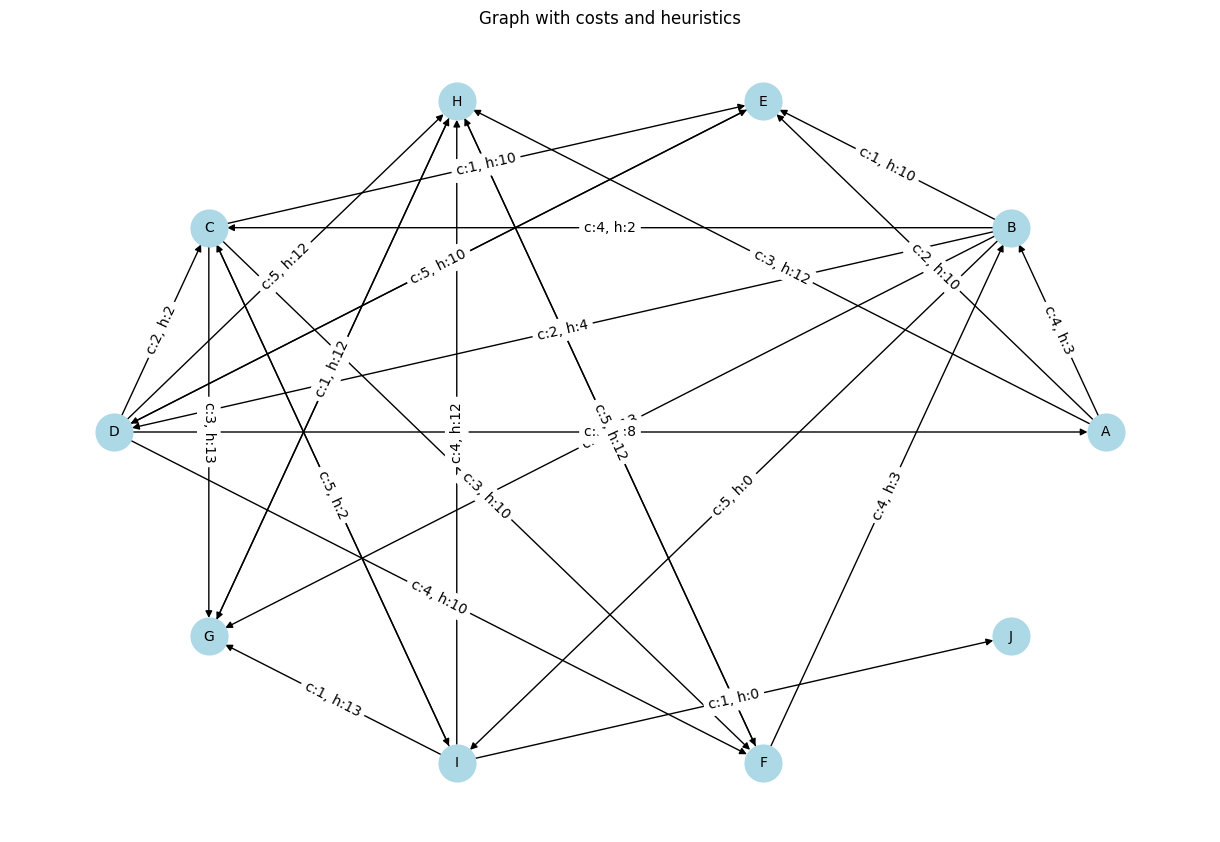

In [4]:
G.draw(title = 'Graph with costs and heuristics')

## 1. Búsqueda en profundidad (DFS)

Ejecute búsqueda en profundidad, teniendo en cuenta que las estados entran a la pila en orden inverso de su etiqueta, de manera que al extraerlos de la pila saldría el estado con menor etiqueta. Igualmente, tenga en cuenta que el algoritmo de búsqueda previene ciclos llevando una lista de nodos alcanzados (reached).

In [10]:
def DFSearch(G,start,end, criteria = None, verbose = False):
    assert G.contains(start) and G.contains(end) and G.defineSortCriteria(option = criteria)
    stack = [(start , [start])]
    out = []
    reached = set()
    while len(stack) > 0:
        if verbose: 
            fridge = get_structure(stack)
            print(f'Out: {fridge[-1]}  -  Fridge: {fridge}')
        cur,path = stack.pop()
        out.append(cur)
        if cur == end:
            if verbose: print(f'\nOut order: {" ".join(out)}') 
            return path
        if cur not in reached:
            reached.add(cur)
            for node in G.adj(cur):
                stack.append((node , path + [node]))
    if verbose: print(f'\nOut order: {" ".join(out)}')
    return None

In [11]:
path = DFSearch(G,'A','J',verbose = True, criteria = 'descending label')
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A  -  Fridge: ['A']
Out: B  -  Fridge: ['H', 'E', 'B']
Out: C  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'C']
Out: E  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'E']
Out: D  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'D']
Out: A  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'F', 'E', 'C', 'A']
Out: C  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'F', 'E', 'C']
Out: E  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'F', 'E']
Out: F  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'F']
Out: B  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'H', 'B']
Out: H  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'H']
Out: F  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'G', 'F']
Out: G  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'G']
Out: H  -  Fridge: ['H', 'E', 'I', 'G', 'E', 'D', 'I', 'G', 'F', 'H', 'H']
Out: H  -  Fridge: ['H', 'E', 

In [ ]:
G.draw(path = path, title = 'DFS ')

## 2. Búsqueda en amplitud (BFS)

Ejecute búsqueda en amplitud, teniendo en cuenta que las estados entran a la cola en el orden
de su etiqueta.

In [12]:
def BFSearch(G,start,end, criteria = None, verbose = False):
    assert G.contains(start) and G.contains(end) and G.defineSortCriteria(option = criteria)
    queue = [(start , [start])]
    out = []
    reached = set()
    while len(queue) > 0:
        if verbose: 
            fridge = get_structure(queue)
            print(f'Out: {fridge[0]}  -  Fridge: {fridge}')
        cur,path = queue.pop(0)
        out.append(cur)
        if cur == end:
            if verbose: print(f'\nOut order: {" ".join(out)}')
            return path
        if cur not in reached:
            reached.add(cur)
            for node in G.adj(cur):
                queue.append((node , path + [node]))
    return None

In [13]:
path = BFSearch(G,'A','J',verbose = True, criteria = 'ascending label')
if path: print('\nFinal path found: '+' -> '.join(path))

Out: A  -  Fridge: ['A']
Out: B  -  Fridge: ['B', 'E', 'H']
Out: E  -  Fridge: ['E', 'H', 'C', 'D', 'E', 'G', 'I']
Out: H  -  Fridge: ['H', 'C', 'D', 'E', 'G', 'I', 'D']
Out: C  -  Fridge: ['C', 'D', 'E', 'G', 'I', 'D', 'F', 'G']
Out: D  -  Fridge: ['D', 'E', 'G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I']
Out: E  -  Fridge: ['E', 'G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H']
Out: G  -  Fridge: ['G', 'I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H']
Out: I  -  Fridge: ['I', 'D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'H']
Out: D  -  Fridge: ['D', 'F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'H', 'C', 'G', 'H', 'J']
Out: F  -  Fridge: ['F', 'G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'H', 'C', 'G', 'H', 'J']
Out: G  -  Fridge: ['G', 'E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'H', 'C', 'G', 'H', 'J', 'B', 'H']
Out: E  -  Fridge: ['E', 'F', 'G', 'I', 'A', 'C', 'E', 'F', 'H', 'H', 'C', 'G', 'H', 'J', 'B', 'H']
Out: F  - 

## 3. Búsqueda de costo uniforme (UCS)

Ahora ejecute búsqueda de costo uniforme. Tenga en cuenta que si hay empates en la cola de prioridad se extrae el estado con menor etiqueta.

In [14]:
import heapq

def UCSearch(G,start,end, criteria = None, verbose = False):
    assert G.contains(start) and G.contains(end) and G.defineSortCriteria(option = criteria)
    pq = []
    out = []
    heapq.heappush(pq,(0,(start , [start])))
    reached = set()
    while len(pq) > 0:
        cost ,(cur,path) = heapq.heappop(pq)
        out.append(cur)
        if cur == end:
            if verbose: print(f'Out order: {" ".join(out)}') 
            return path
        if cur not in reached:
            reached.add(cur)
            for node in G.adj(cur):
                heapq.heappush(pq,(cost + G.cost(cur,node),(node , path + [node])))
    if verbose: print(f'\nOut order: {" ".join(out)}') 
    return None

In [15]:
path = UCSearch(G,'A','J',verbose = True)
if path: print('\nFinal path found: '+' -> '.join(path))

Out order: A E H B E G D H D F C C G A E I F G I J

Final path found: A -> B -> I -> J


## 4. Búsqueda $A^*$

Finalmente ejecute búsqueda $A∗$. Tenga en cuenta que si hay empates en la cola de prioridad se extrae el estado con menor etiqueta.

In [16]:
import heapq

def AStarSearch(G,start,end, criteria = None, verbose = False):
    assert G.contains(start) and G.contains(end) and G.defineSortCriteria(option = criteria)
    pq = []
    out = []
    heapq.heappush(pq,(0,(start , [start])))
    reached = set()
    while len(pq) > 0:
        cost ,(cur,path) = heapq.heappop(pq)
        out.append(cur)
        if cur == end:
            if verbose: print(f'Out order: {" ".join(out)}') 
            return path
        if cur not in reached:
            reached.add(cur)
            for node in G.adj(cur):
                heapq.heappush(pq,(cost + G.cost(cur,node) + G.h(node),(node , path + [node])))
    if verbose: print(f'\nOut order: {" ".join(out)}') 
    return None

In [17]:
path = AStarSearch(G,'A','J',verbose = True)
if path: print('\nFinal path found: '+' -> '.join(path))

Out order: A B E I C D J

Final path found: A -> B -> I -> J
